In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [264]:
dataset = "pets"
record_list = []
data_list = []
for file in os.walk(".\\"):
    results = [f for f in file[2] if ".npy" in f]
    if results != []:
        directory = file[0]
        for result in results:
            if dataset in result:
                data_list.append(np.load(directory+"\\"+result))
                record_list.append(directory+"\\"+result)

In [265]:
columns = [i.split("\\")[-1][:-4] for i in record_list]

In [266]:
largest_record = max(map(lambda x:len(x),data_list))

In [267]:
df = pd.DataFrame(columns=columns)

In [268]:
for count,record in enumerate(record_list):
    data = np.load(record)
    df.iloc[:,count] = np.pad(data,(0,largest_record-len(data)),"constant")

In [269]:
df = df.replace({0:np.nan})

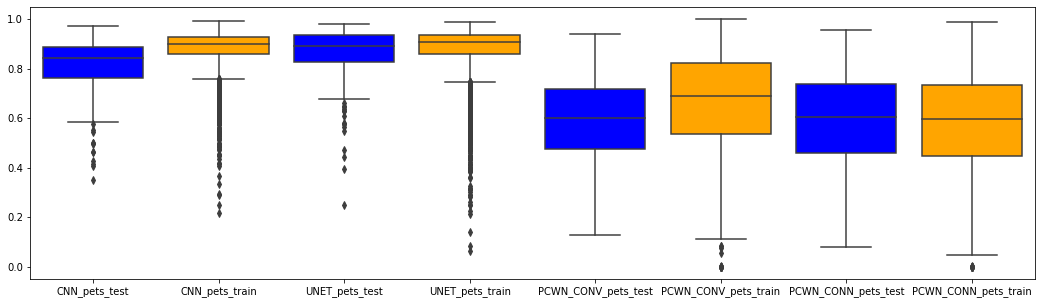

In [270]:
plt.rcParams["figure.figsize"] = (18,5)
ax = sns.boxplot(data=df)

for i in range(0,len(df.columns),2) :
    ax.artists[i].set_facecolor('blue')
    ax.artists[i+1].set_facecolor('orange')

In [271]:
df.describe()

CNN_pets_test  CNN_pets_train  UNET_pets_test  UNET_pets_train  \
count     300.000000     7035.000000      300.000000      7035.000000   
mean        0.812959        0.884539        0.864492         0.885259   
std         0.107630        0.067144        0.102911         0.087213   
min         0.349262        0.214837        0.248864         0.063370   
25%         0.764364        0.859777        0.826689         0.861670   
50%         0.842203        0.899211        0.894087         0.909236   
75%         0.887165        0.927762        0.935276         0.938416   
max         0.974379        0.994159        0.981543         0.990588   

       PCWN_CONV_pets_test  PCWN_CONV_pets_train  PCWN_CONN_pets_test  \
count           300.000000           7049.000000           300.000000   
mean              0.589416              0.670238             0.591932   
std               0.175755              0.196606             0.195806   
min               0.125725              0.000074             0.079583   
25%               0.473491              0.534269             0.458168   
50%               0.601752              0.690782             0.603471   
75%               0.719714              0.823546             0.737585   
max               0.939294              0.999542             0.957976   

       PCWN_CONN_pets_train  
count           7049.000000  
mean               0.585133  
std                0.194124  
min                0.000072  
25%                0.445304  
50%                0.596824  
75%                0.734592  
max                0.988746